In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/media/paulati/Nuevo vol/paula/dh/2021/dsad_2021_paula/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


<link rel="stylesheet" href="../../../common/dhds.css">
<div class="Table">
    <div class="Row">
        <div class="Cell grey left"> <img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_26_Intro-Clasif-KNN/Presentacion/img/M4_CLASE_26_portada.png" align="center" width="90%"/></div>
        <div class="Cell right">
            <div class="div-logo"><img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/common/logo_DH.png" align="center" width=70% /></div>
            <div class="div-curso">DATA SCIENCE</div>
            <div class="div-modulo">MÓDULO 4</div>
            <div class="div-contenido">Introducción a Clasificación - KNN</div>
        </div>
    </div>
</div>

### Agenda

---

- Introducción a Clasificación

- Algoritmo de clasificación KNN - K Nearest Neighbours (vecinos más cercanos)

- Validación y ajuste del modelo

- Estandarización

- Medidas de distancia


### Introducción
---

Recordemos los dos tipos de aprendizaje automático: 

* aprendizaje **supervisado** 

* aprendizaje **no supervisado**

La diferencia entre ambos radica en la **existencia o no de una variable objetivo** para predecir.

* Los métodos supervisados requieren tanto de datos de *input* como el *output* (o target) asociado para generar las reglas. 

* Los métodos no supervisados solo requieren datos de *input*.

###  Aprendizaje supervisado

---

Los algoritmos de aprendizaje supervisado se dividen en dos grandes tipos:

- **Regresiones**, las que ya estuvimos estudiando.

- **Clasificaciones**, las que veremos en detalle en estas clases.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_18_Intro_ML_1/Presentacion/img/M3_CLASE_18_supervisado.jpg" align="center" alt="cuadro" width=70% height=40% />

<a href="https://www.newtechdojo.com/list-machine-learning-algorithms/" target="_blank">https://www.newtechdojo.com/list-machine-learning-algorithms/</a>

###  Clasificación

---

Con la clasificación, buscamos predecir una **variable objetivo** que es **categórica** en lugar de continua. 

Algunos ejemplos típicos:

- Predicción de bajas de clientes a la suscripción de un servicio (modelos de *churn*)
- Distinción de comentarios positivos y negativos en redes sociales
- Filtros de _spam_ en servicios de correo electrónico
- Diagnóstico de enfermedades
- Detección de fraudes de tarjeta de crédito

Existen diferentes modelos que implementan soluciones a problemas de clasificación.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_26_Intro-Clasif-KNN/Presentacion/img/M4_CLASE_26_Classification-Algorithms.jpg" align="center" alt="algoritmos" width=70% height=40% />


<div class="div-dhds-fondo-1"> KNN - K Nearest Neighbours 
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

###  KNN

---
Comenzamos con una técnica simple de clasificación conocida como **_k_ - Nearest Neighbors (KNN)** (vecinos más cercanos).

Informalmente, se puede explicar con la frase *dime con quién andas y te diré quién eres*.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_26_Intro-Clasif-KNN/Presentacion/img/M4_CLASE_26_knn_001.png" align="center" alt="knn_001" width=70% height=40% />

Básicamente, los pasos de KNN son:

1. Memoriza la ubicación de cada observación del train dataset, según los valores de sus _features_.

2. Cuando recibe un dato nuevo, lo ubica también en el espacio.

3. Encuentra los _k_ vecinos más cercanos (**k es un hiperparámetro del modelo**). 

4. Cada uno de ellos aporta un "voto" a la clase a la que pertenece. 

5. La predicción para el dato nuevo queda determinada por la clase mayoritaria entre los "votos" del paso anterior.

###  KNN

---

K- Nearest Neighbors:

- Crea un espacio **N dimensional**, donde cada dimensión es una de las n features. Cada observación se ubica y memoriza en ese espacio.

- Es un algoritmo **lazy** (perezoso), ya que no aprende una función discriminante en la etapa de entrenamiento (no genera un modelo).

- Todas las observaciones se usan al momento de predicción, por lo que es *costosa en términos computacionales*. Y aumenta ese costo al incrementar la cantidad K de vecinos más cercanos. 

- Generalmente funciona con features **continuas**, aunque se puede modificar para trabajar con features categóricas.

- Pertenece a la clase de modelos llamados **IBL: Aprendizaje Basado en Instancias**  (Instance Based Learning).

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html" target="_blank">sklearn.neighbors.KNeighborsClassifier</a>

### Ejemplo

---
Usemos un dataset con diagnósticos de cancer, donde las *features* son características de los núcleos celulares presentes en cada imagen de la masa mamaria.

La variable *target* indica el diagnóstico: *0 - Maligno, 1 - Benigno*.

Pueden consultar detalles del dataset <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">aquí</a>.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_26_Intro-Clasif-KNN/Presentacion/img/M4_CLASE_26_cancer_image.jpg" align="center" alt="cancer_image" width=70% height=40% />

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets

Total de casos:

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns = cancer.feature_names)
X.shape

(569, 30)

Veamos las features:

In [4]:
X.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


La proporción de casos Malignos (cero) y Benignos (uno):

In [5]:
y = pd.Series(cancer.target)
pd.Series(y).value_counts(normalize=True).round(2)

1    0.63
0    0.37
dtype: float64

### Ejemplo

---

**Creamos el modelo KNN:**

- Importamos la clase KNeighborsClassifier del módulo neighbors.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

- Usamos el **hiperparámetro n_neighbors** para indicar la cantidad de vecinos más cercanos. Probemos con 5.

In [7]:
knn = KNeighborsClassifier(n_neighbors=5)

In [8]:
# Generamos los datasets de train y test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2)

# Ajustamos a los datos de entrenamiento.
knn.fit(X_train, y_train);

# Predecimos etiquetas para los datos de test.
y_pred = knn.predict(X_test)

Calculemos el **accuracy** del modelo. Nuestro modelo puede clasificar correctamente el 92% de las observaciones del dataset de *test*. 

In [9]:
# Evaluamos el accuracy del modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred).round(2)

0.92

<div class="div-dhds-fondo-1"> Evaluación del modelo 
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Evaluación del modelo

---

- *¿Cómo sabemos que 5 es el valor óptimo para la cantidad de vecinos más cercanos? ¿Puede ser 1? ¿20?*

Generemos modelos con una secuencia de valores para el hiperparámetro `n_neighbors` entre 1 y 25 (es un número arbitrario).

Evaluemos el *accuracy* de cada uno de ellos; el máximo corresponde al valor K óptimo.

- Por qué tomamos 25 y no 500? Que sucede cuando el número K de vecinos cercanos es muy grande?

---

Generamos una lista con los *accuracy* para cada **n_neighbors** entre 1 y 25.

**Importante:**

Recordemos que en este punto no podemos evaluar accuracy sobre los datos de test porque estamos en la etapa de elegir los mejores hiperparámetros para el modelo.

Si usáramos el conjunto de test, dejarían de ser datos "nunca vistos" en la evaluación de performance del modelo final.

Vamos a resolver esto reservando un conjunto de validación, tomado de los datos de entrenamiento.

In [10]:
X_train_train, X_validation, y_train_train, y_validation = train_test_split(X_train, y_train, random_state=2)

k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_train, y_train_train)
    y_pred = knn.predict(X_validation)
    scores.append(accuracy_score(y_validation, y_pred))    

### Evaluación del modelo

---

El mayor score se encuentra para un K entre 6 y 14, y el 18. Por lo tanto, el valor de `n_neighbors` óptimo es 6, **el que tiene menos vecinos más cercanos**. 

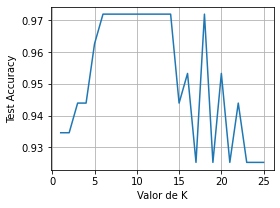

In [11]:
plt.figure(figsize=(4,3))
plt.plot(k_range, scores)
plt.xlabel('Valor de K'); plt.ylabel('Test Accuracy')
plt.grid(); plt.show()

In [12]:
l =  [i for i,val in enumerate(scores) if val==max(scores)]
print('Mínimo K de todos los que tienen máximo score: ', min(l) + 1)
print('Máximo K de todos los que tienen máximo score: ', max(l) + 1)

Mínimo K de todos los que tienen máximo score:  6
Máximo K de todos los que tienen máximo score:  18


### Evaluación del modelo

---
Otra forma más precisa de evaluar los modelos es usando *cross-validation*.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_18_Intro_ML_1/Presentacion/img/M3_CLASE_18_cv.png" align="center" alt="Train_test" width=50% height=30% />

Generamos nuevamente modelos con una secuencia de valores para el hiperparámetro `n_neighbors` entre 1 y 25.

Pero ahora Cross Validation devuelve *tantos resultados o scores como folds le indicamos*. En este caso, por cada valor del hiperparámetro `n_neighbors`, cv devuelve cinco scores, ya que seleccionamos 5 folds.

Luego calculamos *la media* de los scores. Por defecto KNN usa *accuracy*. 

In [13]:
from sklearn.model_selection import cross_val_score, KFold

# Usamos cross validation con 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=12)

scores_para_df = []

for i in range(1, 26):
    
    # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
    model = KNeighborsClassifier(n_neighbors=i)
    
    # cross_val_scores nos devuelve un array de 5 resultados,
    # uno por cada partición que hizo automáticamente CV
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
    
    # Para cada valor de n_neighbours, creamos un diccionario con el valor
    # de n_neighbours y la media de los scores
    dict_row_score = {'score_medio':np.mean(cv_scores), 'n_neighbors':i}
    
    # Guardamos cada uno en la lista de diccionarios
    scores_para_df.append(dict_row_score)

In [14]:
# Creamos el DataFrame a partir de la lista de diccionarios
df_scores = pd.DataFrame(scores_para_df)

### Evaluación del modelo

---

Obtenemos una lista con el *accuracy promedio* para cada valor de K.

In [15]:
df_scores.head(3)

,score_medio,n_neighbors
0,0.920219,1
1,0.908509,2
2,0.929685,3


Identificamos que el valor de `n_neighbors` que maximiza el *score* promedio es 8, con un score de 0.94.

In [16]:
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]

,score_medio,n_neighbors
7,0.939097,8


Grafiquemos la media por cada `n_neighbors`.

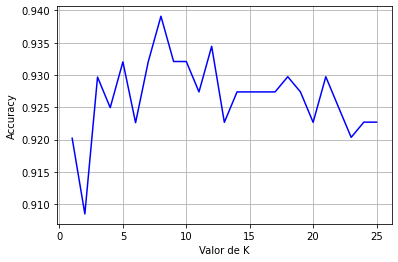

In [17]:
plt.plot(df_scores['n_neighbors'], df_scores['score_medio'], color='b')
plt.xlabel('Valor de K'); plt.ylabel('Accuracy')
plt.grid(); plt.show()

<div class="div-dhds-fondo-1"> Estandarización 
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Estandarización

---

Para definir con precisión la **cercanía** entre las observaciones del dataset, necesitamos una **distancia** que la mida. Veremos luego en detalle este concepto.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_26_Intro-Clasif-KNN/Presentacion/img/M4_CLASE_26_distance_planets.png" align="center" alt="distance_planets" width=70% height=40% />

### Estandarización

---
Mientras tanto, observemos las features con las que estuvimos trabajando:

In [18]:
X.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


---

Cada una de ellas representa una dimensión, un eje, dentro del espacio multidimensional donde se encuentran las observaciones.

No todas se encuentran en la misma escala.

Si tenemos tres dimensiones, las podemos graficar: 

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_26_Intro-Clasif-KNN/Presentacion/img/M4_CLASE_26_tres_coordenadas.png" align="center" alt="tres_coordenadas" width=40% height=25% />

Y notemos que, si cada coordenada *usa distintas unidades de medida*, se generarán **distorsiones** cuando calculamos las distancias entre los puntos del espacio.

### Estandarización

---
Entonces, **lo correcto es estandarizar las variables para eliminar sus distintas unidades de medida y evitar distorsiones debidas a diversas escalas**.

En Python disponemos del método `StandardScaler`.

StandardScaler() normaliza/estandariza cada columna de la matriz X de features, **en forma individual**, con *una media μ = 0* y *un std σ = 1*.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_26_Intro-Clasif-KNN/Presentacion/img/M4_CLASE_26_estandarizacion.png" align="center" alt="tres_coordenadas" width=20% height=15% />

### Estandarización

---

Estandarizamos el dataset de entrenamiento X_train.

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

Verificamos que las variables ahora tengan media 0 y desvío estandar 1.

(Tenemos que ver 30 ceros porque tenemos 30 features, y otros 30 unos)

In [20]:
print('Medias:', np.mean(X_train, axis=0).round(2))
print('Desvio:', np.std(X_train, axis=0).round(2))

Medias: [-0.  0. -0. -0. -0. -0.  0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0. -0.
  0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0.]
Desvio: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


Generamos un nuevo modelo KNN con los datos normalizados.

In [21]:
from sklearn.model_selection import cross_val_score, KFold

# Usamos cross validation con 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=12)

scores_para_df = []

for i in range(1, 26):
    
    # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
    model = KNeighborsClassifier(n_neighbors=i)
    
    # cross_val_scores nos devuelve un array de 5 resultados,
    # uno por cada partición que hizo automáticamente CV
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
    
    # Para cada valor de n_neighbours, creamos un diccionario con el valor
    # de n_neighbours y la media de los scores
    dict_row_score = {'score_medio':np.mean(cv_scores), 'n_neighbors':i}
    
    # Guardamos cada uno en la lista de diccionarios
    scores_para_df.append(dict_row_score)

In [22]:
# Creamos el DataFrame a partir de la lista de diccionarios
df_scores = pd.DataFrame(scores_para_df)

### Estandarización

---
Obtenemos una nueva lista con el *accuracy promedio* para cada valor de K.

In [23]:
df_scores.head(3)

,score_medio,n_neighbors
0,0.948427,1
1,0.957784,2
2,0.962490,3


Ahora el valor de `n_neighbors` que maximiza el *score* promedio es 6, y *mejoramos el score a 0.97*.

In [24]:
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]

,score_medio,n_neighbors
5,0.969466,6


Grafiquemos la media por cada `n_neighbors`.

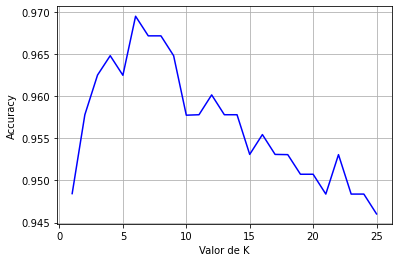

In [25]:
plt.plot(df_scores['n_neighbors'], df_scores['score_medio'], color='b')
plt.xlabel('Valor de K'); plt.ylabel('Accuracy')
plt.grid(); plt.show()

<div class="div-dhds-fondo-1"> Ajuste del modelo
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Ajuste del modelo

---
La capacidad de generalización de un modelo depende de un buen ajuste a los datos de entrenamiento. 

- Si seleccionamos un **K muy bajo**, por ejemplo K=1, el modelo será muy complejo. Tenemos una situación de **overfit**. Con alta varianza y bajo sesgo.

  También el modelo tiende a ser sensible a outliers.

- Si seleccionamos un **K muy alto**, el modelo será demasiado simple. Caemos en una situación de **underfit**. Con baja varianza y alto sesgo.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_18_Intro_ML_1/Presentacion/img/M3_clase_18_sesgo_varianza_2.png" align="center" width=50% height=30% />


### Ajuste del modelo

---
Con KNN, una forma de equilibrar el _trade-off_ entre sesgo y varianza es probar distintos valores del hiperparámetro _k_ hasta encontrar el adecuado. 

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_26_Intro-Clasif-KNN/Presentacion/img/M4_CLASE_26_overfit.PNG" align="center" alt="overfit" width=60% height=70% />

Consideremos la clase de cada observación con dos valores: verde y naranja.

Cada área indica el color a predecir para las observaciones que caen en ella.

* **K=1** Cada área se ajusta a los datos de su clase. Es un sobreajuste.

* **K=3** Es el modelo correcto. Resuelve el dilema entre sesgo y varianza.

* **K=7** Se observan practicamente solo dos áreas; genera un modelo muy simple.


<div class="div-dhds-fondo-1"> Distancias
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Distancias

---

Finalmente, estudiemos en detalle **las distancias**, el concepto que permite a KNN determinar la cercanía entre las observaciones.

¿Por qué distancias? ¿No hay una sola?

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_26_Intro-Clasif-KNN/Presentacion/img/M4_CLASE_26_porque.jpg" align="center" alt="porque" width=50% height=30% />

### Distancias

---

Existen muchas *medidas o métricas* de distancias. Por ejemplo, algunas de ellas:

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_26_Intro-Clasif-KNN/Presentacion/img/M4_CLASE_26_distancias.png" align="center" alt="distancias" width=50% height=30% />



### Similaridad

---
Las métricas de similaridad son una forma de **medir lo "parecidos"** que son los datos entre sí.

Usualmente se expresan con valores numéricos, entre 0 y 1. *0 indica baja similaridad, 1 muy similar*.

Se aplican sobre datos numéricos, alfabéticos, etc.

Un ejemplo de similaridad es el *coeficiente de Jaccard*:

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_26_Intro-Clasif-KNN/Presentacion/img/M4_CLASE_26_jaccard.png" align="center" alt="distancias" width=50% height=30% />

Ejemplo en Python:

In [26]:
def jaccard_similarity(list1, list2):
    s1 = set(list1); s2 = set(list2)
    return float(len(s1.intersection(s2)) / len(s1.union(s2)))

list1 = ['dog', 'cat', 'cat', 'rat']
list2 = ['dog', 'cat', 'mouse']
jaccard_similarity(list1, list2)

0.5

### Distancias (definición)

---
Una métrica d es una distancia si cumple con:

1. No negativa. d(p, q) ≥ 0, para todas observaciones distintas p y q. 
2. Simetría. d(p, q) = d(q, p) para todo p,q.
3. Desigualdad triangular: d(p, q) ≤ d(p, r) + d(r, q) para todo p,q,r.
4. Igualdad. d(p, q) = 0 si y solo si p = q.

#### Distancia Euclidea

---
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_26_Intro-Clasif-KNN/Presentacion/img/M4_CLASE_26_euclidean.png" align="center" alt="euclidean" width=15% height=15% />

Es la medida de distancia más común e intuitiva. 

Se puede pensar a uno de los puntos como el centro de una círculo, y la medida es el radio.

Trabaja bien con datos con baja dimensionalidad. Es la distancia por defecto que usa KNN.

Se define: dados dos puntos $X = (x_1, x_2, ..., x_n)$ e $Y = (y_1, y_2, ..., y_n)$ :

$$ D_{(X, Y)} = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$$

#### Distancia de Manhattan

---
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_26_Intro-Clasif-KNN/Presentacion/img/M4_CLASE_26_manhattan.png" align="center" alt="manhattan" width=15% height=15% />

También llamada *geometría de taxista* o *distancia de manzana de ciudad* por su apariencia similar al recorrido de un taxista en las calles de Manhattan.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_26_Intro-Clasif-KNN/Presentacion/img/M4_CLASE_26_euclidean_manhattan.jpg" align="center" alt="euclidean_manhattan" width=50% height=40% />

Aquí tenemos en lugar de un círculo, un cuadrado. **No se permiten movimientos diagonales para calcular la distancia**.

Parece trabajar bien con datos con *alta dimensionalidad*. La desventaja es que *siempre es mayor a la distancia euclidea*.

Dados dos puntos $X = (x_1, x_2, ..., x_n)$ e $Y = (y_1, y_2, ..., y_n)$ :

$$ D_{(X, Y)} = \sum_{i=1}^{n} |x_i - y_i| $$ 

La distancia entre los dos puntos es la suma de las diferencias (absolutas) de sus coordenadas.

#### Distancia de Chebyshev

---
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_26_Intro-Clasif-KNN/Presentacion/img/M4_CLASE_26_chebychev.png" align="center" alt="chebychev" width=15% height=15% />

Es la máxima distancia en cualquiera de sus ejes. 

Es decir, si cada punto lo vemos como un vector con N coordenadas, se considera la distancia de Chebyshev la mayor de todas las distancias en cada eje.

Podemos comparar las tres distancias:

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_26_Intro-Clasif-KNN/Presentacion/img/M4_CLASE_26_todas.png" align="center" alt="chebychev" width=40% height=30% />

Solo se usa para casos específicos, donde estamos seguros que dará buenos resultados.

Dados dos puntos $X = (x_1, x_2, ..., x_n)$ e $Y = (y_1, y_2, ..., y_n)$ :

$$ D_{(X, Y)} = \max_{i} |x_i - y_i| $$ 

#### Distancia de Minkowski

---
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_26_Intro-Clasif-KNN/Presentacion/img/M4_CLASE_26_minkowski.png" align="center" alt="minkowski" width=15% height=15% />

Es una métrica en un espacio vectorial normalizado. 

Se puede considerar una generalización de las otras distancias.

Se define para dos puntos $X = (x_1, x_2, ..., x_n)$ e $Y = (y_1, y_2, ..., y_n)$ como:

$$ D_{(X, Y)} = (\sum_{i=1}^{n} |x_i - y_i|^p)^{\frac{1}{p}} $$

Lo interesante es el uso del parámetro p:
- p=1. Es la distancia de Manhattan.
- p=2. Es la distancia Euclideana.
- p=∞. Es la distancia de Chebyshev.

### Distancias y KNN

---
Apliquemos al dataset con diagnosticos de cancer, KNN usando distintas medidas de distancia.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric" traget="_blank">sklearn.neighbors.DistanceMetric</a>

In [27]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns = cancer.feature_names)
y = pd.Series(cancer.target)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

- Usamos la métrica de distancia euclidea. Y evaluamos el modelo

In [29]:
knn = KNeighborsClassifier(metric='euclidean', n_neighbors=5)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2)
knn.fit(X_train, y_train);
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred).round(2)

0.92

- Usamos la métrica de distancia de Manhattan.

In [31]:
knn = KNeighborsClassifier(metric='manhattan',n_neighbors=5)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2)
knn.fit(X_train, y_train);
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred).round(2)

0.92

- Usamos la métrica de distancia de Chebyshev.

In [33]:
knn = KNeighborsClassifier(metric='chebyshev',n_neighbors=5)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2)
knn.fit(X_train, y_train);
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred).round(2)

0.92

<div class="div-dhds-fondo-1"> Conclusiones 
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Conclusiones

---

El modelo K- Nearest Neighbors - KNN - es uno de los algoritmos más sencillos para clasificar.

* Permite clasificar a partir de la cercanía con otras observaciones del dataset de entrenamiento.

* No genera un modelo, la predicción se realiza usando todas las observaciones.

* K es el hiperparámetro del modelo, que es número de vecinos a considerar.

* Para validar el modelo, debemos variar K y medir su performance. Es conveniente usar cross validation.

* Las medidas de distancia es lo que determina la cercanía entre los datos. Existen distintas tipos de distancias.

<div class="div-dhds-fondo-1"> Hands-on
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Ejercicio

----

Usando el dataset de diagnosticos de tipo de cancer, calculemos la performance para los K entre 1 y 15, y aplicando las distancias euclidea y de Manhattan.

Para medir la performance, usar cross validation de 10 folds.

Mostrar el *K óptimo*, *su performance*, y *graficar la performance para todos los K*.

Nota: conviene generar una función y reusarla para las distintas distancias.

In [35]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold

Traemos el dataset.

In [37]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns = cancer.feature_names)
y = pd.Series(cancer.target)

Generamos los dataset de train y test.

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2)

### Solución

---

### Ejercicio

----

Usando el dataset de diagnosticos de tipo de cancer, calculemos la performance para los K entre 1 y 15, y aplicando las distancias euclidea y de Manhattan.

Para medir la performance, usar cross validation de 10 folds.

Mostrar el K óptimo, su performance, y graficar la performance para todos los K.

Nota: conviene generar una función y reusarla para las distintas distancias.

In [39]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold

Traemos el dataset.

In [41]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns = cancer.feature_names)
y = pd.Series(cancer.target)

Generamos los dataset de train y test.

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2)

Creamos la función.

In [43]:
def scores_knn(X, y, start,stop, folds, metrica):
    
    # Usamos cross validation con 10 folds
    kf = KFold(n_splits=folds, shuffle=True, random_state=12)

    scores_para_df = []

    for i in range(start, stop):
    
        # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
        model = KNeighborsClassifier(metric=metrica,n_neighbors=i)
    
        # cross_val_scores nos devuelve un array de 5 resultados,
        # uno por cada partición que hizo automáticamente CV
        cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
    
        # Para cada valor de n_neighbours, creamos un diccionario con el valor
        # de n_neighbours y la media de los scores
        dict_row_score = {'score_medio':np.mean(cv_scores), 'n_neighbors':i}
    
        # Guardamos cada uno en la lista de diccionarios
        scores_para_df.append(dict_row_score)

    # Creamos el DataFrame a partir de la lista de diccionarios
    df_scores = pd.DataFrame(scores_para_df)
    
    # Retornamos el DF
    return df_scores    

### Distancia euclidea

---

Obtenemos una lista con el *accuracy promedio* para cada valor de K.

In [44]:
df_scores = scores_knn(X_train, y_train, 1, 16, 10, 'euclidean')

In [45]:
df_scores.head(3)

,score_medio,n_neighbors
0,0.927243,1
1,0.915393,2
2,0.934275,3


Identificamos que el valor de `n_neighbors` que maximiza el *score* promedio es 5, con un score de 0.94.

In [46]:
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]

,score_medio,n_neighbors
4,0.943632,5


Grafiquemos la media por cada `n_neighbors`.

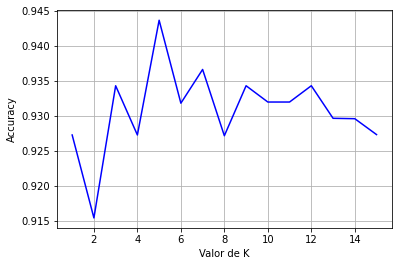

In [47]:
plt.plot(df_scores['n_neighbors'], df_scores['score_medio'], color='b')
plt.xlabel('Valor de K'); plt.ylabel('Accuracy')
plt.grid(); plt.show()

### Distancia de Manhattan

---

Obtenemos una lista con el *accuracy promedio* para cada valor de K.

In [48]:
df_scores = scores_knn(X_train, y_train, 1, 16, 10, 'manhattan')

In [49]:
df_scores.head(3)

,score_medio,n_neighbors
0,0.931894,1
1,0.908416,2
2,0.939037,3


Identificamos que el valor de `n_neighbors` que maximiza el *score* promedio es 5, con un score de 0.94.

In [50]:
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]

,score_medio,n_neighbors
4,0.946069,5


Grafiquemos la media por cada `n_neighbors`.

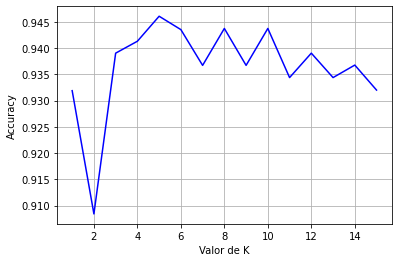

In [51]:
plt.plot(df_scores['n_neighbors'], df_scores['score_medio'], color='b')
plt.xlabel('Valor de K'); plt.ylabel('Accuracy')
plt.grid(); plt.show()

<div class="div-dhds-fondo-1"> Referencias y Material Adicional
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Referencias y Material Adicional

---

<a href="https://towardsdatascience.com/laymans-introduction-to-knn-c793ed392bc2" target="_blank">laymans-introduction-to-knn</a>

<a href="https://medium.datadriveninvestor.com/k-nearest-neighbors-knn-7b4bd0128da7" target="_blank">k-nearest-neighbors-knn</a>

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html" target="_blank">SK-learn KNeighborsClassifier</a>

<a href="https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa" target="_blank">9-distance-measures-in-data-science</a>

<a href="https://towardsdatascience.com/17-types-of-similarity-and-dissimilarity-measures-used-in-data-science-3eb914d2681" target="_blank">7-types-of-similarity-and-dissimilarity-measures</a>